In [1]:
#importing the required packages
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
#loading the given csv data
data = pd.read_csv(r'C:\Users\Dell\Downloads\cardio_data1.csv')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,Male,168.0,62.0,110,80,normal,normal,no,no,yes,no
1,1,20228,Female,156.0,85.0,140,90,well above normal,normal,no,no,yes,yes
2,2,18857,Female,165.0,64.0,130,70,well above normal,normal,no,no,no,yes
3,3,17623,Male,169.0,82.0,150,100,normal,normal,no,no,yes,yes
4,4,17474,Female,156.0,56.0,100,60,normal,normal,no,no,no,no


In [3]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [4]:
#finding the number of columns and rows
data.shape

(70000, 13)

In [5]:
#Statistical summary
data.describe()

,id,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,69941.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,164.358116,74.205690,128.817286,96.630414
std,28851.302323,2467.251667,8.210681,14.395757,154.011419,188.472530
min,0.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,25006.750000,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,50001.500000,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,74889.250000,21327.000000,170.000000,82.000000,140.000000,90.000000
max,99999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000


In [6]:
#finding the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       69992 non-null  object 
 3   height       69941 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  69985 non-null  object 
 8   gluc         70000 non-null  object 
 9   smoke        70000 non-null  object 
 10  alco         69987 non-null  object 
 11  active       70000 non-null  object 
 12  cardio       70000 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 6.9+ MB


# Exploratory Data Analysis

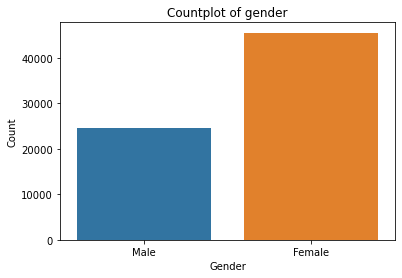

In [7]:
sns.countplot(x=data["gender"])
plt.title("Countplot of gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In this dataset number of females is higher than males.

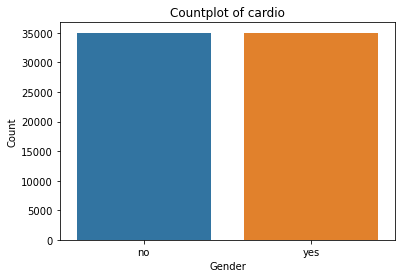

In [8]:
sns.countplot(x=data["cardio"])
plt.title("Countplot of cardio")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

The number of people with cardiovascular and without cardiovascular are almost similar

In [9]:
data["cardio"].value_counts(normalize=True)

no     0.5003
yes    0.4997
Name: cardio, dtype: float64

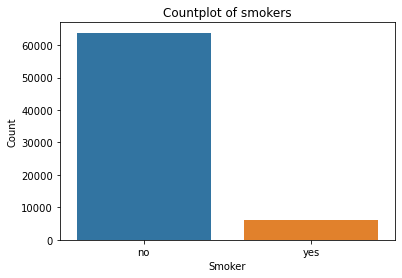

In [10]:
sns.countplot(x=data["smoke"])
plt.title("Countplot of smokers")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.show()

The number of smokers are lesser compaired to non smokers.More than 90 % of patients are non smokers.

In [11]:
data["smoke"].value_counts(normalize=True)

no     0.911871
yes    0.088129
Name: smoke, dtype: float64

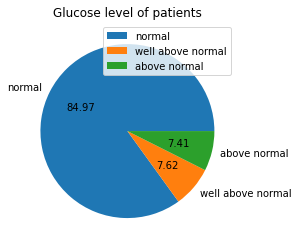

In [12]:
plt.pie(x=data["gluc"].value_counts(),labels=['normal', 'well above normal', 'above normal'],autopct='%.2f')
plt.title('Glucose level of patients')
plt.legend()
plt.show()

84.97% of patients having glucose level in normal.7.41% of patients have above normal level of glucose and 7.62% of patients have well above normal level of glucose

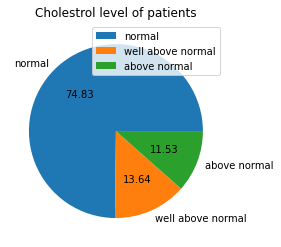

In [13]:
plt.pie(x=data["cholesterol"].value_counts(),labels=['normal', 'well above normal', 'above normal'],autopct='%.2f')
plt.title('Cholestrol level of patients')
plt.legend()
plt.show()

About 74.84% of them have a normal cholestrol value. 11.52% have above normal value of cholestrol and 13.64% patients has well above normal value.



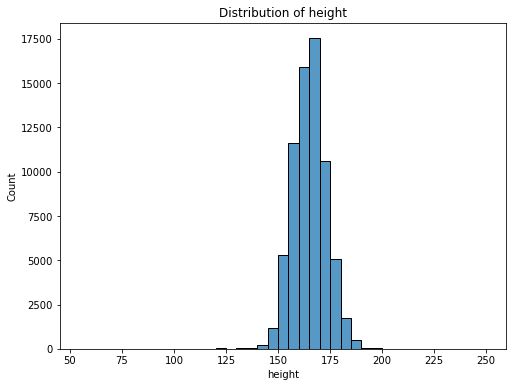

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(data["height"],binwidth=5)
plt.title("Distribution of height")
plt.show()

Most of people height in between 155 to 175.Very few pople having height lessthan 150.

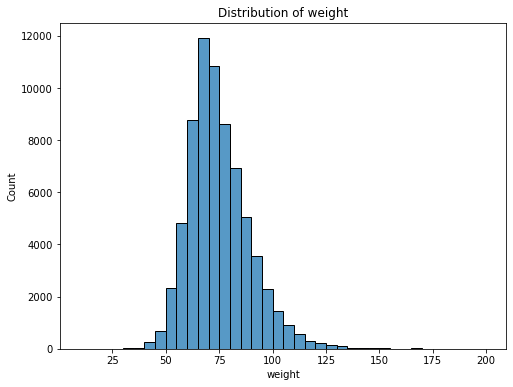

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(data["weight"],binwidth=5)
plt.title("Distribution of weight")
plt.show()

Graph is right skewed.Nearly 40000 people with weight range between 65 to 75

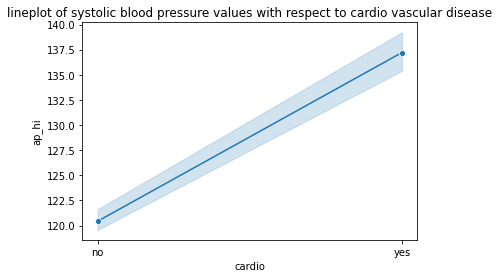

In [16]:
sns.lineplot(x=data['cardio'],y=data['ap_hi'],marker='o')
plt.title('lineplot of systolic blood pressure values with respect to cardio vascular disease')
plt.show()

As the value of ap_hi increases the chances for cardio vascular disease also increases. Both are directly proportional.

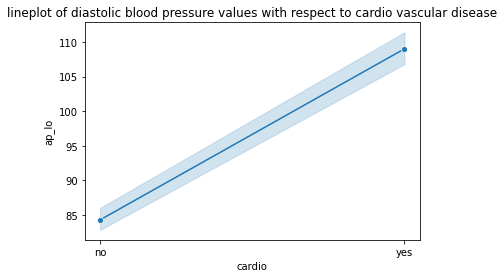

In [17]:
sns.lineplot(x=data['cardio'],y=data['ap_lo'],marker='o')
plt.title('lineplot of diastolic blood pressure values with respect to cardio vascular disease')
plt.show()

As the value of ap_lo increases the chances for cardio vascular disease also increases. Both are directly proportional.

In [18]:
#age is given in number of days.So we want to change into year
#data["age"]=np.round(data["age"]/365)
data['age']=np.round(data['age']/365)

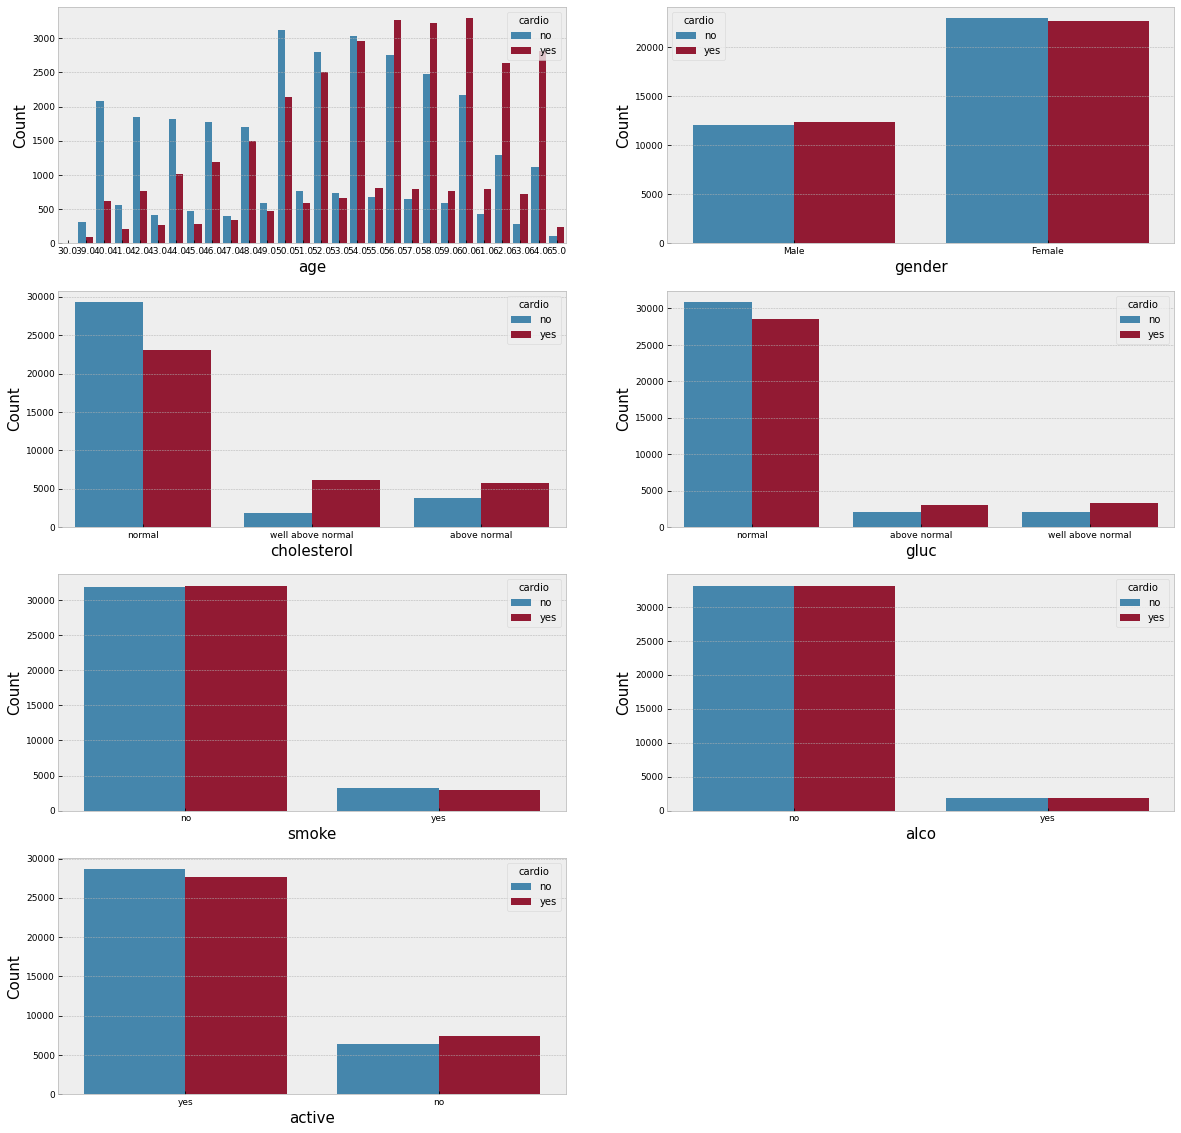

In [19]:
#setting the required plot style
plt.style.use('bmh')
#Defining a function graph()
def graph(x):
    sns.countplot(x = x,hue= 'cardio', data = data )
    #adding labels for x and y axis
    plt.xlabel(x, fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
plt.figure(figsize=(20,20))
#plotting subplots using the function graph()
plt.subplot(421)
graph('age')
plt.subplot(422)
graph('gender')
plt.subplot(423)
graph('cholesterol')
plt.subplot(424)
graph('gluc')
plt.subplot(425)
graph('smoke')
plt.subplot(426)
graph('alco')
plt.subplot(427)
graph('active')
plt.show();

> As age increases the chance of getting cardio disease increases

> Cholesterol and gluc have less effect on cardio disease

> Cardio diseases are more common in both males and females.Since the female data is more in the dataset, number of females having CVD disease are more than males

> Consumption of alcohol and smoking habit has less effect as its similar to those who don't have these habits.

> Active people can also have a chance of cardio disease

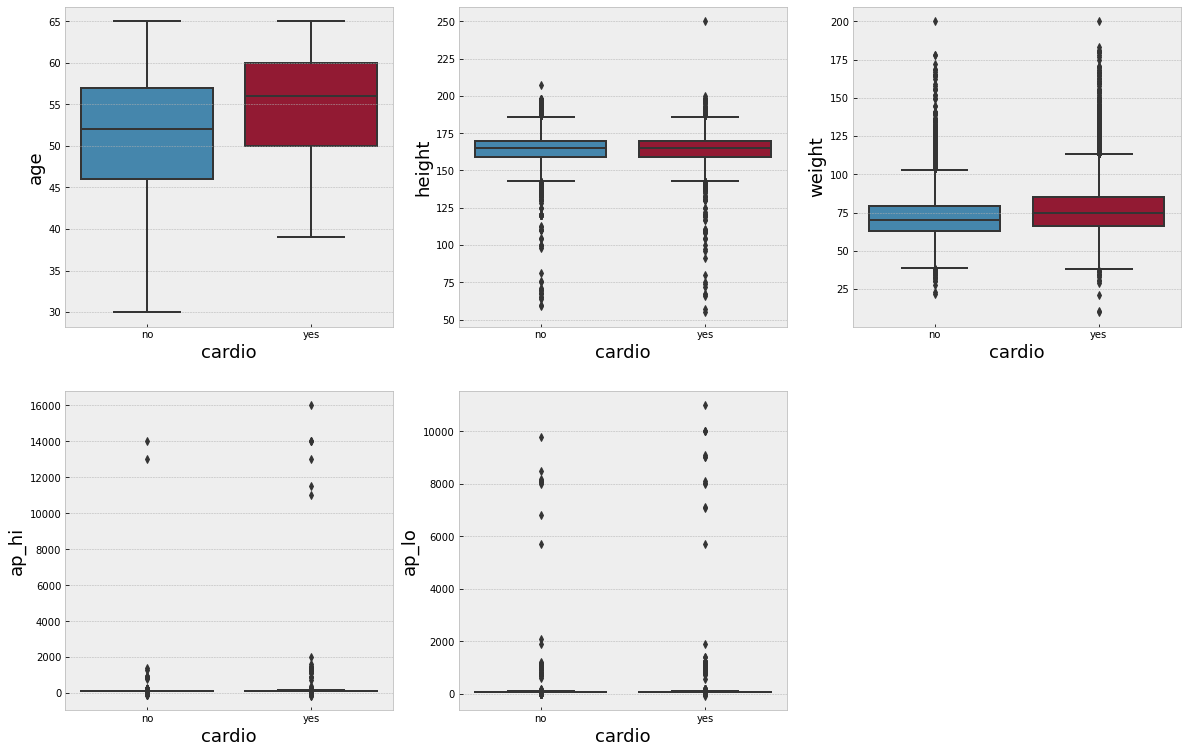

In [20]:
#setting the required plot style
plt.style.use('bmh')
#Defining a function graph()
def graph(y):
    sns.boxplot(x = 'cardio', y = y , data = data)
    plt.xlabel('cardio', fontsize = 18)
    plt.ylabel( y, fontsize = 18)
plt.figure(figsize=(20,20))
#plotting subplots using the function graph()
plt.subplot(331)
graph('age')
plt.subplot(332)
graph('height')
plt.subplot(333)
graph('weight')
plt.subplot(334)
graph('ap_hi')
plt.subplot(335)
graph('ap_lo')
plt.show();


> Cardio disease is common for people having:
    
• Age 50-60 years

• Weight 70-80kg

• Systolic pressure 120-200 mmHg

• Diastolic pressure 80-120 mmHg

• Outliers need to be handled

# Data Cleaning

In [21]:
#Missing Values

In [22]:
#Checking for null values
data.isna().sum()

id              0
age             0
gender          8
height         59
weight          0
ap_hi           0
ap_lo           0
cholesterol    15
gluc            0
smoke           0
alco           13
active          0
cardio          0
dtype: int64

In [23]:
#Since the alco and chlesterol are categorical values,null values can be filled with mode.

In [24]:
cols=['alco','cholesterol','gender']
for i in cols:
    data[i]=data[i].fillna(data[i].mode()[0])
    

In [25]:
#plotting of missing values of height

<function matplotlib.pyplot.show(close=None, block=None)>

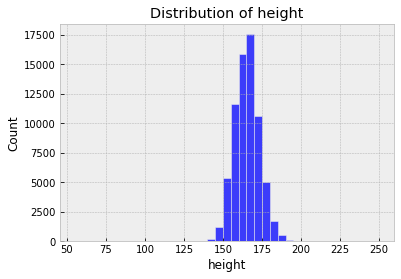

In [26]:
sns.histplot(data['height'],binwidth=5)
plt.title('Distribution of height')
plt.show

In [27]:
#Since the data distribution is normal,we can fill the missing values of height with mean

In [28]:
data['height']=data['height'].fillna(data['height'].mean())

In [29]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [30]:
#finding unique values
data.nunique()

id             70000
age               28
gender             2
height           110
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [31]:
#Dropping of 'id' column

In [32]:
data.drop('id',axis=1,inplace=True)

In [33]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,Male,168.0,62.0,110,80,normal,normal,no,no,yes,no
1,55.0,Female,156.0,85.0,140,90,well above normal,normal,no,no,yes,yes
2,52.0,Female,165.0,64.0,130,70,well above normal,normal,no,no,no,yes
3,48.0,Male,169.0,82.0,150,100,normal,normal,no,no,yes,yes
4,48.0,Female,156.0,56.0,100,60,normal,normal,no,no,no,no


In [34]:
#sorting categorical values
categorical_features = data.select_dtypes(include=[np.object])
categorical_features.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio
0,Male,normal,normal,no,no,yes,no
1,Female,well above normal,normal,no,no,yes,yes
2,Female,well above normal,normal,no,no,no,yes
3,Male,normal,normal,no,no,yes,yes
4,Female,normal,normal,no,no,no,no


In [35]:
#sorting numerical values
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head()

,age,height,weight,ap_hi,ap_lo
0,50.0,168.0,62.0,110,80
1,55.0,156.0,85.0,140,90
2,52.0,165.0,64.0,130,70
3,48.0,169.0,82.0,150,100
4,48.0,156.0,56.0,100,60


In [36]:
numerical_features.columns

Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo'], dtype='object')

#### Outlier detection

#### age

In [37]:
#Managing Outliers
Q1 = np.percentile(data['age'],25,interpolation='midpoint')
Q2 = np.percentile(data['age'],50,interpolation='midpoint')
Q3 = np.percentile(data['age'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)

33.0
73.0


In [38]:
outlier = []
for x in data ['age']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)
outlier

[30.0, 30.0, 30.0, 30.0]

#### height

In [39]:
#Managing Outliers
Q1 = np.percentile(data['height'],25,interpolation='midpoint')
Q2 = np.percentile(data['height'],50,interpolation='midpoint')
Q3 = np.percentile(data['height'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)

142.5
186.5


In [40]:
outlier = []
for x in data ['height']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)
outlier
len(outlier)

519

In [41]:
data[data['height'] < 125]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
224,60.0,Male,76.0,55.0,120,80,normal,normal,no,no,yes,no
3420,40.0,Female,100.0,70.0,100,70,normal,normal,no,no,yes,no
3735,48.0,Female,120.0,70.0,120,70,normal,normal,no,no,yes,no
3752,42.0,Female,120.0,30.0,110,70,normal,normal,no,no,yes,no
4212,44.0,Female,120.0,80.0,120,80,normal,normal,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...
65302,51.0,Female,99.0,60.0,90,60,normal,normal,no,no,yes,no
66023,40.0,Female,120.0,80.0,120,70,above normal,normal,no,no,yes,no
66479,46.0,Male,110.0,90.0,110,90,normal,normal,no,no,yes,no
66643,52.0,Female,57.0,61.0,130,90,normal,normal,no,no,yes,yes


In [42]:
data=data[data['height']>= 125]

In [43]:
data[data['height'] > 200]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6486,58.0,Female,250.0,86.0,140,100,well above normal,normal,no,no,yes,yes
21628,52.0,Male,207.0,78.0,100,70,normal,normal,no,yes,yes,no


In [44]:
data.drop(index=6486,axis=1,inplace=True)

#### weight

In [45]:
#Managing Outliers
Q1 = np.percentile(data['weight'],25,interpolation='midpoint')
Q2 = np.percentile(data['weight'],50,interpolation='midpoint')
Q3 = np.percentile(data['weight'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)

39.5
107.5


In [46]:
outlier = []
for x in data ['weight']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)
outlier
len(outlier)

1810

In [47]:
data=data[data['weight']> 40]

#### ap_hi

In [48]:
#Managing Outliers
Q1 = np.percentile(data['ap_hi'],25,interpolation='midpoint')
Q2 = np.percentile(data['ap_hi'],50,interpolation='midpoint')
Q3 = np.percentile(data['ap_hi'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)

90.0
170.0


In [49]:
outlier = []
for x in data ['ap_hi']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)
outlier
len(outlier)

1429

#### ap_lo

In [50]:
#Managing Outliers
Q1 = np.percentile(data['ap_lo'],25,interpolation='midpoint')
Q2 = np.percentile(data['ap_lo'],50,interpolation='midpoint')
Q3 = np.percentile(data['ap_lo'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)

65.0
105.0


In [51]:
outlier = []
for x in data ['ap_lo']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)
outlier
len(outlier)

4601

In [52]:
## systolic pressure below 90 mmHg and above 180mmHg needs medical intervention
critical_aphi = (data.ap_hi <70) | (data.ap_hi > 200)
data[critical_aphi].ap_hi.count() / data.ap_hi.count()

0.004110628911900772

In [53]:
#dropping 0.4% data
data.drop(data[critical_aphi].index, inplace=True)

In [54]:
## diastolic pressure below 60mmHg ang above 110mmHg is dangerous
critical_aplo = (data.ap_lo <40) | (data.ap_lo > 130)
data[critical_aplo].ap_lo.count() / data.ap_lo.count()

0.014913996433296899

In [55]:
#dropping 1.49% data
data.drop(data[critical_aplo].index, inplace=True)

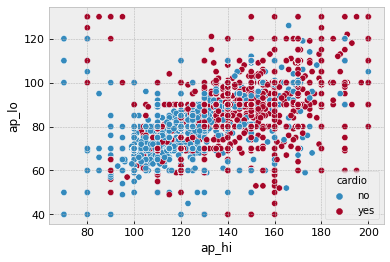

In [56]:
#plotting api_hi and api_lo
plt.style.use('bmh')
sns.scatterplot(x = 'ap_hi', y = 'ap_lo' , hue= 'cardio' , data = data,  s=40)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

### BMI analysis

In [57]:
data_bmi = data.copy()

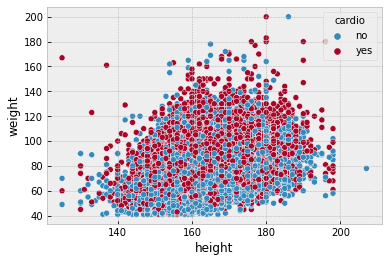

In [58]:
sns.scatterplot(x ='height', y ='weight', hue = 'cardio', data= data_bmi);

In [59]:
#create bmi feature
def BMI(data):
    return round(data['weight'] / (data ['height'] /100)**2,2)
data_bmi['BMI'] = data_bmi.apply(BMI, axis=1)

In [60]:
data_bmi.describe().T

,count,mean,std,min,25%,50%,75%,max
age,68495.0,53.326199,6.766890,30.00,48.00,54.00,58.00,65.00
height,68495.0,164.449177,7.836294,125.00,159.00,165.00,170.00,207.00
weight,68495.0,74.145506,14.235543,41.00,65.00,72.00,82.00,200.00
ap_hi,68495.0,126.567487,16.522226,70.00,120.00,120.00,140.00,200.00
ap_lo,68495.0,81.311030,9.403520,40.00,80.00,80.00,90.00,130.00
BMI,68495.0,27.453613,5.200906,14.53,23.88,26.35,30.12,106.88


In [61]:
data_num = data.select_dtypes(include=[np.number])
data_num.columns

Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo'], dtype='object')

In [62]:
data.rename(columns={'ap_hi': 'systolic','ap_lo':'diastolic'},inplace=True)

###  Label Encoding

In [63]:
categorical_features.columns

Index(['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'], dtype='object')

In [64]:
#apply label encoding
from sklearn.preprocessing import LabelEncoder
columns =['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
label_encoder = LabelEncoder()
for i in columns:
    data[i]=label_encoder.fit_transform(data[i])
data.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,1,168.0,62.0,110,80,1,1,0,0,1,0
1,55.0,0,156.0,85.0,140,90,2,1,0,0,1,1
2,52.0,0,165.0,64.0,130,70,2,1,0,0,0,1
3,48.0,1,169.0,82.0,150,100,1,1,0,0,1,1
4,48.0,0,156.0,56.0,100,60,1,1,0,0,0,0


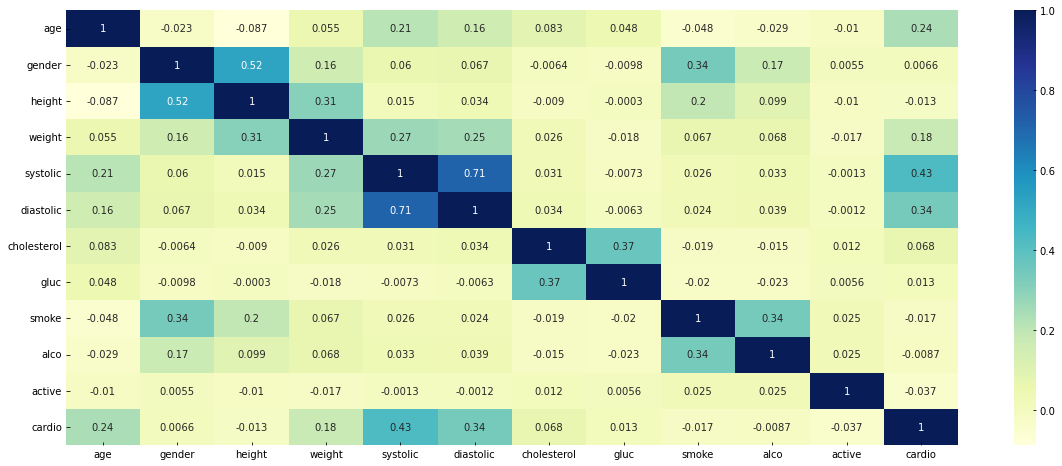

In [65]:
#plot correlation matrix
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu');

In [66]:
data.dtypes

age            float64
gender           int32
height         float64
weight         float64
systolic         int64
diastolic        int64
cholesterol      int32
gluc             int32
smoke            int32
alco             int32
active           int32
cardio           int32
dtype: object

In [67]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'systolic', 'diastolic',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [68]:
data_num=data[['age','height','weight','systolic', 'diastolic']]

In [69]:
data_cat=data[['gender','cholesterol','gluc','smoke','alco','active','cardio']]

In [70]:
data_cat.columns

Index(['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'], dtype='object')

In [71]:
data_num.columns

Index(['age', 'height', 'weight', 'systolic', 'diastolic'], dtype='object')

In [72]:
data_num.reset_index(drop=True,inplace=True)
data_cat.reset_index(drop=True,inplace=True)

In [73]:
#concat numerical and categorical columns
data = pd.concat([data_num,data_cat],axis=1)
data.head()

,age,height,weight,systolic,diastolic,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,168.0,62.0,110,80,1,1,1,0,0,1,0
1,55.0,156.0,85.0,140,90,0,2,1,0,0,1,1
2,52.0,165.0,64.0,130,70,0,2,1,0,0,0,1
3,48.0,169.0,82.0,150,100,1,1,1,0,0,1,1
4,48.0,156.0,56.0,100,60,0,1,1,0,0,0,0


In [74]:
data.isna().sum()

age            0
height         0
weight         0
systolic       0
diastolic      0
gender         0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Without scaling

# 1.Logistic Regression

In [75]:
X=data.drop(['cardio',"alco"],axis=1)
Y=data['cardio']

In [76]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [77]:
LR1=LogisticRegression()
LR_model1=LR1.fit(X_train,Y_train)
prediction1=LR_model1.predict(X_test)

In [78]:
prediction1

array([1, 0, 1, ..., 1, 1, 0])

In [79]:
#prediction1=pd.DataFrame(prediction1)

In [80]:
confusion_matrix(Y_test,prediction1)

array([[5178, 1741],
       [2319, 4461]], dtype=int64)

In [81]:
print("The precision score is\t :",precision_score(Y_test,prediction1))
print("The accuracy score is\t :",accuracy_score(Y_test,prediction1))
print("The recall score is\t :",recall_score(Y_test,prediction1))

The precision score is	 : 0.719284101902612
The accuracy score is	 : 0.7036280020439448
The recall score is	 : 0.6579646017699115


# 2. XG boost Classifier

In [82]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600)
xgb_m=xgb.fit(X_train, Y_train)
y_pred_xgb = xgb_m.predict(X_test)

In [83]:
confusion_matrix(Y_test,y_pred_xgb)

array([[5389, 1530],
       [2161, 4619]], dtype=int64)

In [84]:
print("The precision score is\t :",precision_score(Y_test,y_pred_xgb))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_xgb))
print("The recall score is\t :",recall_score(Y_test,y_pred_xgb))

The precision score is	 : 0.7511790535046349
The accuracy score is	 : 0.7305642747645814
The recall score is	 : 0.681268436578171


# 3.  kNN 

In [85]:
#set number for k in the range 3 to 14.Finding the accuracy score for different values for k
metric_k=[]
neighbors=range(3,14)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,Y_train)
    y_pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(Y_test,y_pred_kNN)
    metric_k.append(acc)

In [86]:
#print the list
metric_k

[0.6638440762099423,
 0.6686619461274546,
 0.6829695598218848,
 0.6861084750711731,
 0.6930432878312286,
 0.6959632089933572,
 0.6968391853419957,
 0.6984451419811665,
 0.702314037520987,
 0.703044017811519,
 0.704357982334477]

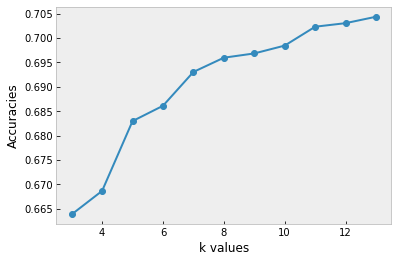

In [87]:
#Another method to find the accurate values.Plot graph
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()
plt.show()

In [88]:
#Same steps above with k=13
classifier=KNeighborsClassifier(n_neighbors=13)
classifier=classifier.fit(X_train,Y_train)
y_pred_kNN=classifier.predict(X_test)

In [89]:
confusion_matrix(Y_test,y_pred_kNN)

array([[5141, 1778],
       [2272, 4508]], dtype=int64)

In [90]:
print("The precision score is\t :",precision_score(Y_test,y_pred_kNN))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_kNN))
print("The recall score is\t :",recall_score(Y_test,y_pred_kNN))

The precision score is	 : 0.7171492204899778
The accuracy score is	 : 0.704357982334477
The recall score is	 : 0.6648967551622419


# 4. SVM Model

In [91]:
#with linear keranal
#svm_clf=SVC(kernel="linear")
#svm_clf=svm_clf.fit(X_train,Y_train)
#y_pred_svm=svm_clf.predict(X_test)

In [92]:
#confusion_matrix(Y_test,y_pred_svm)

In [93]:
#print("The precision score is\t :",precision_score(Y_test,y_pred_svm))
#print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_svm))
#print("The recall score is\t :",recall_score(Y_test,y_pred_svm))

In [94]:
#with Radial Basis Function (RBF)
#svm_clf2=SVC(kernel="rbf")
#svm_clf2=svm_clf2.fit(X_train,Y_train)
#y_pred_svm2=svm_clf2.predict(X_test)

In [95]:
#print confusion matrix
#confusion_matrix(Y_test,y_pred_svm2)

In [96]:
#print("The precision score is\t :",precision_score(Y_test,y_pred_svm2))
#print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_svm2))
#print("The recall score is\t :",recall_score(Y_test,y_pred_svm2))

# 5.Decision Tree  model

In [97]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(X_train,Y_train)
y_pred_dt=dt_clf.predict(X_test)

In [98]:
confusion_matrix(Y_test,y_pred_dt)

array([[4577, 2342],
       [2671, 4109]], dtype=int64)

In [99]:
print("The precision score is\t :",precision_score(Y_test,y_pred_dt))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_dt))
print("The recall score is\t :",recall_score(Y_test,y_pred_dt))

The precision score is	 : 0.6369555107735235
The accuracy score is	 : 0.6340608803562304
The recall score is	 : 0.6060471976401179


# 6.Random Forest 

In [100]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(X_train,Y_train)
y_pred_rf=rf_clf.predict(X_test)

In [101]:
confusion_matrix(Y_test,y_pred_rf)

array([[4917, 2002],
       [2137, 4643]], dtype=int64)

In [102]:
print("The precision score is\t :",precision_score(Y_test,y_pred_rf))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_rf))
print("The recall score is\t :",recall_score(Y_test,y_pred_rf))

The precision score is	 : 0.6987208427389014
The accuracy score is	 : 0.6978611577487408
The recall score is	 : 0.6848082595870206


# 7. Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB() 
nb_m=nb.fit(X_train, Y_train)
y_pred_nb = nb_m.predict(X_test)

In [104]:
confusion_matrix(Y_test,y_pred_rf)

array([[4917, 2002],
       [2137, 4643]], dtype=int64)

In [105]:
print("The precision score is\t :",precision_score(Y_test,y_pred_nb))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_nb))
print("The recall score is\t :",recall_score(Y_test,y_pred_nb))

The precision score is	 : 0.7432814710042432
The accuracy score is	 : 0.7059639389736477
The recall score is	 : 0.6200589970501474


# Min Max Scaling

In [106]:
data.describe()

,age,height,weight,systolic,diastolic,gender,cholesterol,gluc,smoke,alco,active,cardio
count,68495.000000,68495.000000,68495.000000,68495.000000,68495.00000,68495.000000,68495.000000,68495.000000,68495.000000,68495.000000,68495.000000,68495.000000
mean,53.326199,164.449177,74.145506,126.567487,81.31103,0.348858,0.979283,1.002336,0.088036,0.053522,0.803329,0.494620
std,6.766890,7.836294,14.235543,16.522226,9.40352,0.476612,0.499505,0.386950,0.283349,0.225074,0.397485,0.499975
min,30.000000,125.000000,41.000000,70.000000,40.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,165.000000,72.000000,120.000000,80.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,170.000000,82.000000,140.000000,90.00000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,207.000000,200.000000,200.000000,130.00000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
data_num.columns

Index(['age', 'height', 'weight', 'systolic', 'diastolic'], dtype='object')

In [108]:
data_num_min_max=data_num

In [109]:
data_num_min_max

,age,height,weight,systolic,diastolic
0,50.0,168.0,62.0,110,80
1,55.0,156.0,85.0,140,90
2,52.0,165.0,64.0,130,70
3,48.0,169.0,82.0,150,100
4,48.0,156.0,56.0,100,60
...,...,...,...,...,...
68490,53.0,168.0,76.0,120,80
68491,62.0,158.0,126.0,140,90
68492,52.0,183.0,105.0,180,90
68493,61.0,163.0,72.0,135,80


In [110]:
min_max_scaler=MinMaxScaler(feature_range=(0,1))
data_num_min_max=min_max_scaler.fit_transform(data_num_min_max)

In [111]:
type(data_num_min_max)

numpy.ndarray

In [112]:
data_num_min_max=pd.DataFrame(data_num_min_max)

In [113]:
data_num_min_max.columns=['age', 'height', 'weight', 'systolic', 'diastolic']
data_num_min_max.describe().T

,count,mean,std,min,25%,50%,75%,max
age,68495.0,0.666463,0.193340,0.0,0.514286,0.685714,0.800000,1.0
height,68495.0,0.481088,0.095565,0.0,0.414634,0.487805,0.548780,1.0
weight,68495.0,0.208462,0.089532,0.0,0.150943,0.194969,0.257862,1.0
systolic,68495.0,0.435135,0.127094,0.0,0.384615,0.384615,0.538462,1.0
diastolic,68495.0,0.459011,0.104484,0.0,0.444444,0.444444,0.555556,1.0


In [114]:
#concat numerical and categorical columns
data1 = pd.concat([data_num_min_max,data_cat],axis=1)
data1.head()

,age,height,weight,systolic,diastolic,gender,cholesterol,gluc,smoke,alco,active,cardio
0,0.571429,0.524390,0.132075,0.307692,0.444444,1,1,1,0,0,1,0
1,0.714286,0.378049,0.276730,0.538462,0.555556,0,2,1,0,0,1,1
2,0.628571,0.487805,0.144654,0.461538,0.333333,0,2,1,0,0,0,1
3,0.514286,0.536585,0.257862,0.615385,0.666667,1,1,1,0,0,1,1
4,0.514286,0.378049,0.094340,0.230769,0.222222,0,1,1,0,0,0,0


# 8. Logistic Regression with Min Max scaling

In [115]:
X=data1.drop(['cardio',"alco"],axis=1)
Y=data1['cardio']

In [116]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [117]:
LR2=LogisticRegression()
LR_model2=LR2.fit(X_train,Y_train)
prediction2=LR_model2.predict(X_test)

In [118]:
prediction2

array([1, 0, 1, ..., 1, 1, 0])

In [119]:
#prediction2=pd.DataFrame(prediction2)

In [120]:
confusion_matrix(Y_test,prediction2)

array([[5349, 1570],
       [2299, 4481]], dtype=int64)

In [121]:
print("The precision score is\t :",precision_score(Y_test,prediction2))
print("The accuracy score is\t :",accuracy_score(Y_test,prediction2))
print("The recall score is\t :",recall_score(Y_test,prediction2))

The precision score is	 : 0.740538753924971
The accuracy score is	 : 0.717570625593109
The recall score is	 : 0.6609144542772861


# 9. kNN -Min Max

In [122]:
#set number for k in the range 3 to 14.Finding the accuracy score for different values for k
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,Y_train)
    y_pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(Y_test,y_pred_kNN)
    metric_k.append(acc)

In [123]:
#print the list
metric_k

[0.6740638002773925,
 0.6788816701949048,
 0.6946492444703993,
 0.6982991459230601,
 0.7026060296371998,
 0.7057449448864881,
 0.7059639389736477,
 0.7096138404263085,
 0.7088108621067232,
 0.7123147675012774,
 0.711803781297905,
 0.7150886926052996]

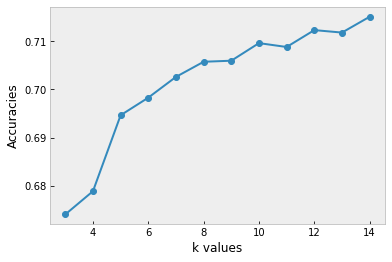

In [124]:
#Another method to find the accurate values.Plot graph
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()
plt.show()

In [125]:
#Same steps above with k=12
classifier=KNeighborsClassifier(n_neighbors=12)
classifier=classifier.fit(X_train,Y_train)
y_pred_kNN=classifier.predict(X_test)

In [126]:
confusion_matrix(Y_test,y_pred_kNN)

array([[5374, 1545],
       [2396, 4384]], dtype=int64)

In [127]:
print("The precision score is\t :",precision_score(Y_test,y_pred_kNN))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_kNN))
print("The recall score is\t :",recall_score(Y_test,y_pred_kNN))

The precision score is	 : 0.739416427728116
The accuracy score is	 : 0.7123147675012774
The recall score is	 : 0.6466076696165192


# 10. SVM-Linear_Min Max

In [128]:
#with linear keranal
#svm_clf=SVC(kernel="linear")
#svm_clf=svm_clf.fit(X_train,Y_train)
#y_pred_svm=svm_clf.predict(X_test)

In [129]:
#confusion_matrix(Y_test,y_pred_svm)

In [130]:
#print("The precision score is\t :",precision_score(Y_test,y_pred_svm))
#print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_svm))
#print("The recall score is\t :",recall_score(Y_test,y_pred_svm))

In [131]:
# SVM-RBF-Min Max

In [132]:
#with Radial Basis Function (RBF)
#svm_clf2=SVC(kernel="rbf")
#svm_clf2=svm_clf2.fit(X_train,Y_train)
#y_pred_svm2=svm_clf2.predict(X_test)

In [133]:
#print confusion matrix
#confusion_matrix(Y_test,y_pred_svm2)

In [134]:
#print("The precision score is\t :",precision_score(Y_test,y_pred_svm2))
#print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_svm2))
#print("The recall score is\t :",recall_score(Y_test,y_pred_svm2))

# 11. Decision Tree-Min Max

In [135]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(X_train,Y_train)
y_pred_dt=dt_clf.predict(X_test)

In [136]:
confusion_matrix(Y_test,y_pred_dt)

array([[4569, 2350],
       [2652, 4128]], dtype=int64)

In [137]:
print("The precision score is\t :",precision_score(Y_test,y_pred_dt))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_dt))
print("The recall score is\t :",recall_score(Y_test,y_pred_dt))

The precision score is	 : 0.637233714109293
The accuracy score is	 : 0.6348638586758157
The recall score is	 : 0.6088495575221239


# 12. Random Forest-Min Max

In [138]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(X_train,Y_train)
y_pred_rf=rf_clf.predict(X_test)

In [139]:
confusion_matrix(Y_test,y_pred_rf)

array([[4926, 1993],
       [2129, 4651]], dtype=int64)

In [140]:
print("The precision score is\t :",precision_score(Y_test,y_pred_rf))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_rf))
print("The recall score is\t :",recall_score(Y_test,y_pred_rf))

The precision score is	 : 0.7000301023479831
The accuracy score is	 : 0.6991021242426454
The recall score is	 : 0.6859882005899705


# 13. XG Boost Classifier-Min Max

In [141]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600)
xgb_m=xgb.fit(X_train, Y_train)
y_pred_xgb = xgb_m.predict(X_test)

In [142]:
confusion_matrix(Y_test,y_pred_xgb)

array([[5389, 1530],
       [2161, 4619]], dtype=int64)

In [143]:
print("The precision score is\t :",precision_score(Y_test,y_pred_xgb))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_xgb))
print("The recall score is\t :",recall_score(Y_test,y_pred_xgb))

The precision score is	 : 0.7511790535046349
The accuracy score is	 : 0.7305642747645814
The recall score is	 : 0.681268436578171


# 14. Naive Bayes- Min Max

In [144]:
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB() 
nb_m=nb.fit(X_train, Y_train)
y_pred_nb = nb_m.predict(X_test)

In [145]:
confusion_matrix(Y_test,y_pred_nb)

array([[5467, 1452],
       [2576, 4204]], dtype=int64)

In [146]:
print("The precision score is\t :",precision_score(Y_test,y_pred_nb))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_nb))
print("The recall score is\t :",recall_score(Y_test,y_pred_nb))

The precision score is	 : 0.7432814710042432
The accuracy score is	 : 0.7059639389736477
The recall score is	 : 0.6200589970501474


# Standardisation

In [147]:
std_sclr=StandardScaler()

In [148]:
data_num_std=data_num

In [149]:
data_num_std=std_sclr.fit_transform(data_num_std)

In [150]:
type(data_num_std)

numpy.ndarray

In [151]:
data_num_std=pd.DataFrame(data_num_std)

In [152]:
data_num_std.columns=['age', 'height', 'weight', 'systolic', 'diastolic']
data_num_std.describe().T

,count,mean,std,min,25%,50%,75%,max
age,68495.0,2.674747e-16,1.000007,-3.447133,-0.787103,0.099574,0.690692,1.725148
height,68495.0,1.825149e-15,1.000007,-5.034199,-0.695382,0.070292,0.708353,5.430007
weight,68495.0,-4.805185e-16,1.000007,-2.328380,-0.642446,-0.150716,0.551756,8.840928
systolic,68495.0,2.951229e-16,1.000007,-3.423746,-0.397497,-0.397497,0.813003,4.444501
diastolic,68495.0,-7.509189e-16,1.000007,-4.393177,-0.139420,-0.139420,0.924019,5.177776


In [153]:
#concat numerical and categorical columns
data2 = pd.concat([data_num_std,data_cat],axis=1)
data2.head()

,age,height,weight,systolic,diastolic,gender,cholesterol,gluc,smoke,alco,active,cardio
0,-0.491544,0.453129,-0.853188,-1.002747,-0.139420,1,1,1,0,0,1,0
1,0.247353,-1.078219,0.762498,0.813003,0.924019,0,2,1,0,0,1,1
2,-0.195985,0.070292,-0.712694,0.207753,-1.202859,0,2,1,0,0,0,1
3,-0.787103,0.580741,0.551756,1.418252,1.987458,1,1,1,0,0,1,1
4,-0.787103,-1.078219,-1.274671,-1.607996,-2.266299,0,1,1,0,0,0,0


# 15. Logistic Regression after Standard scaling

In [154]:
X=data2.drop(['cardio',"alco"],axis=1)
Y=data2['cardio']

In [155]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [156]:
LR3=LogisticRegression()
LR_model3=LR3.fit(X_train,Y_train)
prediction3=LR_model3.predict(X_test)

In [157]:
prediction3

array([1, 0, 1, ..., 1, 1, 0])

In [158]:
Log_reg_score=LR_model3.score(X_test,Y_test)

In [159]:
Log_reg_score

0.7177896196802687

In [160]:
confusion_matrix(Y_test,prediction3)

array([[5351, 1568],
       [2298, 4482]], dtype=int64)

In [161]:
print("The precision score is\t :",precision_score(Y_test,prediction3))
print("The accuracy score is\t :",accuracy_score(Y_test,prediction3))
print("The recall score is\t :",recall_score(Y_test,prediction3))

The precision score is	 : 0.7408264462809917
The accuracy score is	 : 0.7177896196802687
The recall score is	 : 0.6610619469026549


In [162]:
#Applying Stratified k-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold,cross_val_score
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies_log_reg = cross_val_score(estimator=LR_model3, X=X_train, y=Y_train, cv=skf)

In [163]:
accuracies_log_reg

array([0.72427007, 0.72956204, 0.73047445, 0.71642336, 0.72080292,
       0.72992701, 0.72677496, 0.72713999, 0.72348969, 0.71929184])

In [164]:
accuracies_log_reg.mean()

0.7248156331473989

# 16. kNN-SS

In [165]:
#set number for k in the range 3 to 14.Finding the accuracy score for different values for k
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,Y_train)
    y_pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(Y_test,y_pred_kNN)
    metric_k.append(acc)

In [166]:
#print the list
metric_k

[0.6741367983064457,
 0.6782246879334258,
 0.6925323016278561,
 0.6966201912548361,
 0.7038469961311045,
 0.7077888896999781,
 0.7085188699905103,
 0.7108548069202132,
 0.7124607635593839,
 0.715891670924885,
 0.7171326374187897,
 0.717935615738375]

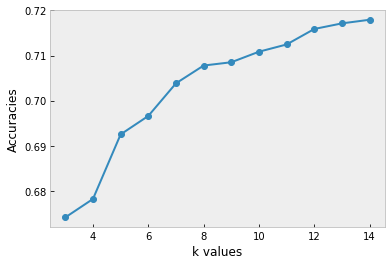

In [167]:
#Another method to find the accurate values.Plot graph
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()
plt.show()

In [168]:
#Same steps above with k=14
classifier=KNeighborsClassifier(n_neighbors=14)
classifier=classifier.fit(X_train,Y_train)
y_pred_kNN=classifier.predict(X_test)

In [169]:
KNN_score=classifier.score(X_test,Y_test)

In [170]:
confusion_matrix(Y_test,y_pred_kNN)

array([[5422, 1497],
       [2367, 4413]], dtype=int64)

In [171]:
KNN_score

0.717935615738375

In [172]:
print("The precision score is\t :",precision_score(Y_test,y_pred_kNN))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_kNN))
print("The recall score is\t :",recall_score(Y_test,y_pred_kNN))

The precision score is	 : 0.7467005076142132
The accuracy score is	 : 0.717935615738375
The recall score is	 : 0.6508849557522124


# Stratified Kfold validation

In [173]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies_classifier = cross_val_score(estimator=classifier, X=X_train, y=Y_train, cv=skf)

In [174]:
accuracies_classifier

array([0.72208029, 0.71532847, 0.72080292, 0.71551095, 0.72007299,
       0.72627737, 0.72531484, 0.71691915, 0.72111699, 0.72020442])

In [175]:
accuracies_classifier.mean()

0.7203628386020678

# 17. SVM-Linear_SS

In [176]:
#with linear keranal
#svm_clf=SVC(kernel="linear")
#svm_clf=svm_clf.fit(X_train,Y_train)
#y_pred_svm=svm_clf.predict(X_test)

In [177]:
#confusion_matrix(Y_test,y_pred_svm)

In [178]:
#print("The precision score is\t :",precision_score(Y_test,y_pred_svm))
#print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_svm))
#print("The recall score is\t :",recall_score(Y_test,y_pred_svm))

In [179]:
# SVM -RBF-SS

In [180]:
#with Radial Basis Function (RBF)
#svm_clf2=SVC(kernel="rbf")
#svm_clf2=svm_clf2.fit(X_train,Y_train)
#y_pred_svm2=svm_clf2.predict(X_test)

In [181]:
#print confusion matrix
#confusion_matrix(Y_test,y_pred_svm2)

In [182]:
#print("The precision score is\t :",precision_score(Y_test,y_pred_svm2))
#print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_svm2))
#print("The recall score is\t :",recall_score(Y_test,y_pred_svm2))

# 18. Decision Tree-SS

In [183]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(X_train,Y_train)
y_pred_dt=dt_clf.predict(X_test)

In [184]:
Dec_score=dt_clf.score(X_test,Y_test)

In [185]:
Dec_score

0.635301846850135

In [186]:
confusion_matrix(Y_test,y_pred_dt)

array([[4562, 2357],
       [2639, 4141]], dtype=int64)

In [187]:
print("The precision score is\t :",precision_score(Y_test,y_pred_dt))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_dt))
print("The recall score is\t :",recall_score(Y_test,y_pred_dt))

The precision score is	 : 0.6372730070791013
The accuracy score is	 : 0.635301846850135
The recall score is	 : 0.6107669616519174


# Stratified Kfold validation

In [188]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies_dt_clf = cross_val_score(estimator=dt_clf, X=X_train, y=Y_train, cv=skf)

In [189]:
accuracies_dt_clf

array([0.6370438 , 0.62791971, 0.62828467, 0.6350365 , 0.6379562 ,
       0.64215328, 0.63953276, 0.63296222, 0.63716007, 0.63478737])

In [190]:
accuracies_dt_clf.mean()

0.6352836577083304

# 19. Random forest-SS

In [191]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(X_train,Y_train)
y_pred_rf=rf_clf.predict(X_test)

In [192]:
Rf_score=rf_clf.score(X_test,Y_test)

In [193]:
Rf_score

0.6976421636615812

In [194]:
confusion_matrix(Y_test,y_pred_rf)

array([[4913, 2006],
       [2136, 4644]], dtype=int64)

In [195]:
print("The precision score is\t :",precision_score(Y_test,y_pred_rf))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_rf))
print("The recall score is\t :",recall_score(Y_test,y_pred_rf))

The precision score is	 : 0.6983458646616542
The accuracy score is	 : 0.6976421636615812
The recall score is	 : 0.6849557522123894


# Stratified Kfold

In [196]:
##Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies_rf_clf = cross_val_score(estimator=rf_clf, X=X_train, y=Y_train, cv=skf)

In [197]:
accuracies_rf_clf

array([0.69470803, 0.70328467, 0.70072993, 0.69872263, 0.70237226,
       0.70766423, 0.70615076, 0.70943603, 0.70980106, 0.70012776])

In [198]:
accuracies_rf_clf.mean()

0.7032997356862233

# 20. XG Boost Classifier- SS

In [199]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600)
xgb_m=xgb.fit(X_train, Y_train)
y_pred_xgb = xgb_m.predict(X_test)


In [200]:
XG_score=xgb_m.score(X_test,Y_test)
XG_score

0.7305642747645814

In [201]:
confusion_matrix(Y_test,y_pred_xgb)

array([[5389, 1530],
       [2161, 4619]], dtype=int64)

In [202]:
print("The precision score is\t :",precision_score(Y_test,y_pred_xgb))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_xgb))
print("The recall score is\t :",recall_score(Y_test,y_pred_xgb))

The precision score is	 : 0.7511790535046349
The accuracy score is	 : 0.7305642747645814
The recall score is	 : 0.681268436578171


# Stratified Kfold

In [203]:
##Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies_xgb = cross_val_score(estimator=xgb_m, X=X_train, y=Y_train, cv=skf)

In [204]:
accuracies_xgb

array([0.7350365 , 0.74051095, 0.73521898, 0.72755474, 0.73375912,
       0.73832117, 0.74082862, 0.73644826, 0.7369958 , 0.72805256])

In [205]:
accuracies_xgb.mean()

0.7352726701686466

# 21. Naive bayes-SS

In [206]:
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB() 
nb_m=nb.fit(X_train, Y_train)
y_pred_nb = nb_m.predict(X_test)

In [207]:
NB_score=nb_m.score(X_test,Y_test)
NB_score

0.7059639389736477

In [208]:
confusion_matrix(Y_test,y_pred_nb)

array([[5467, 1452],
       [2576, 4204]], dtype=int64)

In [209]:
print("The precision score is\t :",precision_score(Y_test,y_pred_nb))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_nb))
print("The recall score is\t :",recall_score(Y_test,y_pred_nb))

The precision score is	 : 0.7432814710042432
The accuracy score is	 : 0.7059639389736477
The recall score is	 : 0.6200589970501474


# Stratified Kfold validation of Naive Bayes

In [210]:
##Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies_nb = cross_val_score(estimator=nb_m, X=X_train, y=Y_train, cv=skf)

In [211]:
accuracies_nb

array([0.71131387, 0.71478102, 0.71806569, 0.70656934, 0.71277372,
       0.70565693, 0.72385472, 0.71326884, 0.71326884, 0.71691915])

In [212]:
accuracies_nb.mean()

0.7136472137144747

# Normalization

In [213]:
data_num_normal=data_num

In [214]:
data_num_normal

,age,height,weight,systolic,diastolic
0,50.0,168.0,62.0,110,80
1,55.0,156.0,85.0,140,90
2,52.0,165.0,64.0,130,70
3,48.0,169.0,82.0,150,100
4,48.0,156.0,56.0,100,60
...,...,...,...,...,...
68490,53.0,168.0,76.0,120,80
68491,62.0,158.0,126.0,140,90
68492,52.0,183.0,105.0,180,90
68493,61.0,163.0,72.0,135,80


In [215]:
data_num_normal=preprocessing.normalize(data_num_normal)

In [216]:
type(data_num_normal)

numpy.ndarray

In [217]:
data_num_normal=pd.DataFrame(data_num_normal)

In [218]:
data_num_normal.columns=['age', 'height', 'weight', 'ap_hi', 'ap_lo']
data_num_normal.describe().T

,count,mean,std,min,25%,50%,75%,max
age,68495.0,0.221015,0.028262,0.126721,0.200764,0.222678,0.241906,0.315654
height,68495.0,0.681968,0.039918,0.425461,0.656610,0.688040,0.708739,0.839322
weight,68495.0,0.305608,0.047963,0.158713,0.272991,0.299266,0.333109,0.637214
ap_hi,68495.0,0.522041,0.043232,0.294667,0.495789,0.515366,0.547234,0.713882
ap_lo,68495.0,0.335890,0.027667,0.146944,0.321053,0.337205,0.351446,0.558732


In [219]:
#concat numerical and categorical columns
data3 = pd.concat([data_num_normal,data_cat],axis=1)
data3.head()

,age,height,weight,ap_hi,ap_lo,gender,cholesterol,gluc,smoke,alco,active,cardio
0,0.217047,0.729278,0.269138,0.477503,0.347275,1,1,1,0,0,1,0
1,0.220378,0.625071,0.340584,0.560961,0.360618,0,2,1,0,0,1,1
2,0.220084,0.698344,0.270873,0.550211,0.296267,0,2,1,0,0,0,1
3,0.181308,0.638354,0.309734,0.566587,0.377724,1,1,1,0,0,1,1
4,0.230471,0.749031,0.268883,0.480148,0.288089,0,1,1,0,0,0,0


# 22. Logistic Regression with normalized data

In [220]:
X=data3.drop(['cardio',"alco"],axis=1)
Y=data3['cardio']

In [221]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [222]:
LR4=LogisticRegression()
LR_model4=LR4.fit(X_train,Y_train)
prediction4=LR_model4.predict(X_test)

In [223]:
prediction4

array([1, 0, 1, ..., 1, 1, 0])

In [224]:
confusion_matrix(Y_test,prediction4)

array([[5155, 1764],
       [2300, 4480]], dtype=int64)

In [225]:
print("The precision score is\t :",precision_score(Y_test,prediction4))
print("The accuracy score is\t :",accuracy_score(Y_test,prediction4))
print("The recall score is\t :",recall_score(Y_test,prediction4))

The precision score is	 : 0.7174887892376681
The accuracy score is	 : 0.7033360099277319
The recall score is	 : 0.6607669616519174


# 23. kNN-Normalization

In [226]:
#set number for k in the range 3 to 14.Finding the accuracy score for different values for k
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,Y_train)
    y_pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(Y_test,y_pred_kNN)
    metric_k.append(acc)

In [227]:
#print the list
metric_k

[0.6685889480984013,
 0.6731878239287539,
 0.6878604277684502,
 0.6913643331630046,
 0.6967661873129426,
 0.6998321045331776,
 0.7013650631432952,
 0.7053069567121688,
 0.7066209212351267,
 0.7075698956128185,
 0.7090298561938828,
 0.7090298561938828]

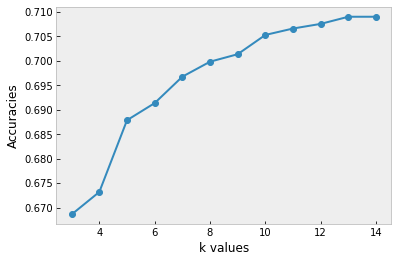

In [228]:
#Another method to find the accurate values.Plot graph
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()
plt.show()

In [229]:
#Same steps above with k=14
classifier=KNeighborsClassifier(n_neighbors=14)
classifier=classifier.fit(X_train,Y_train)
y_pred_kNN=classifier.predict(X_test)

In [230]:
confusion_matrix(Y_test,y_pred_kNN)

array([[5361, 1558],
       [2428, 4352]], dtype=int64)

In [231]:
print("The precision score is\t :",precision_score(Y_test,y_pred_kNN))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_kNN))
print("The recall score is\t :",recall_score(Y_test,y_pred_kNN))

The precision score is	 : 0.7363790186125212
The accuracy score is	 : 0.7090298561938828
The recall score is	 : 0.6418879056047198


# 24. SVM-Linear

In [232]:
#with linear keranal
#svm_clf=SVC(kernel="linear")
#svm_clf=svm_clf.fit(X_train,Y_train)
#y_pred_svm=svm_clf.predict(X_test)

In [233]:
#confusion_matrix(Y_test,y_pred_svm)

In [234]:
#print("The precision score is\t :",precision_score(Y_test,y_pred_svm))
#print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_svm))
#print("The recall score is\t :",recall_score(Y_test,y_pred_svm))

In [235]:
# SVM-Rbf

In [236]:
#with Radial Basis Function (RBF)
#svm_clf2=SVC(kernel="rbf")
#svm_clf2=svm_clf2.fit(X_train,Y_train)
#y_pred_svm2=svm_clf2.predict(X_test)

In [237]:
#print confusion matrix
#confusion_matrix(Y_test,y_pred_svm2)

In [238]:
#print("The precision score is\t :",precision_score(Y_test,y_pred_svm2))
#print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_svm2))
#print("The recall score is\t :",recall_score(Y_test,y_pred_svm2))

# 25. Decision Tree-Normalization

In [239]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(X_train,Y_train)
y_pred_dt=dt_clf.predict(X_test)

In [240]:
confusion_matrix(Y_test,y_pred_dt)

array([[4488, 2431],
       [2671, 4109]], dtype=int64)

In [241]:
print("The precision score is\t :",precision_score(Y_test,y_pred_dt))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_dt))
print("The recall score is\t :",recall_score(Y_test,y_pred_dt))

The precision score is	 : 0.6282874617737003
The accuracy score is	 : 0.6275640557704942
The recall score is	 : 0.6060471976401179


# 26. Random Forest-Normalization

In [242]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(X_train,Y_train)
y_pred_rf=rf_clf.predict(X_test)

In [243]:
confusion_matrix(Y_test,y_pred_rf)

array([[5002, 1917],
       [2147, 4633]], dtype=int64)

In [244]:
print("The precision score is\t :",precision_score(Y_test,y_pred_rf))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_rf))
print("The recall score is\t :",recall_score(Y_test,y_pred_rf))

The precision score is	 : 0.7073282442748091
The accuracy score is	 : 0.7033360099277319
The recall score is	 : 0.6833333333333333


# 27. XG Boost Classifier-Normalization

In [245]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600)
xgb_m=xgb.fit(X_train, Y_train)
y_pred_xgb = xgb_m.predict(X_test)

In [246]:
confusion_matrix(Y_test,y_pred_xgb)

array([[5370, 1549],
       [2284, 4496]], dtype=int64)

In [247]:
print("The precision score is\t :",precision_score(Y_test,y_pred_xgb))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_xgb))
print("The recall score is\t :",recall_score(Y_test,y_pred_xgb))

The precision score is	 : 0.7437551695616211
The accuracy score is	 : 0.7201985546390247
The recall score is	 : 0.6631268436578172


# 28.Naive bayes-Normalization

In [248]:
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB() 
nb_m=nb.fit(X_train, Y_train)
y_pred_nb = nb_m.predict(X_test)

In [249]:
print("The precision score is\t :",precision_score(Y_test,y_pred_nb))
print("The accuracy score is\t :",accuracy_score(Y_test,y_pred_nb))
print("The recall score is\t :",recall_score(Y_test,y_pred_nb))

The precision score is	 : 0.7244755244755244
The accuracy score is	 : 0.6925323016278561
The recall score is	 : 0.6112094395280236


In [250]:
confusion_matrix(Y_test,y_pred_nb)

array([[5343, 1576],
       [2636, 4144]], dtype=int64)

# Best accuracy scores of Models 

In [251]:
models = [ 'Logistic Regression','KNN','Decision Tree','Random Forest', 'XGBoost','Naive Bayes']
data = [ Log_reg_score*100,KNN_score*100,Dec_score*100,Rf_score*100, XG_score*100,NB_score*100]
cols = ['Accuracy Score']
pd.DataFrame(data=data , index= models , columns= cols).sort_values(by=['Accuracy Score'], ascending= False)

,Accuracy Score
XGBoost,73.056427
KNN,71.793562
Logistic Regression,71.778962
Naive Bayes,70.596394
Random Forest,69.764216
Decision Tree,63.530185


# Mean accuracy scores of models after applying the KFold cross validation

In [252]:
model = ['Random Forest', 'Decision Tree', 'KNN', 'Naive Bayes', 'XGBoost','Logistic Regression']
scores = [accuracies_rf_clf.mean()*100,accuracies_dt_clf.mean()*100,accuracies_classifier.mean()*100,accuracies_nb.mean()*100,accuracies_xgb.mean()*100,accuracies_log_reg.mean()*100]

summary = pd.DataFrame(data=scores, index=model, columns=['Mean Accuracy'])
summary.sort_values(by=['Mean Accuracy'], ascending=False)

,Mean Accuracy
XGBoost,73.527267
Logistic Regression,72.481563
KNN,72.036284
Naive Bayes,71.364721
Random Forest,70.329974
Decision Tree,63.528366


# Conclusion


>The XGBoost model was the best performer out of proposed models giving us a mean accuracy score of 73.52%.

>K-Fold cross validation was used to ensure no overfitting was done.

>Hyperparameter Tuning was further performed on the models; but for some models it took much time to run..

>So we took the second best model Logistic Regression after Stratified KFold for better prediction which gives mean accuracy score of 72.48% 

# Fine Tuning

# XG Boost

In [253]:
### Applying Grid Search to find the best model and best parameters 
#from sklearn.model_selection import GridSearchCV
#create xgboost classifier
#xgb=XGBClassifier()

#define set of parameters that will be investigated by Grid Search
#parameters = {
           # 'learning_rate': [0.01, 0.02, 0.05, 0.1],
           # 'max_depth': [3, 4, 5]}

In [254]:
#grid = GridSearchCV(xgb,param_grid = parameters,scoring = 'accuracy',cv=10,n_jobs = -1)

In [255]:
#grid.fit(X_train, Y_train)

In [256]:
#grid.best_params_

In [257]:
#grid.best_estimator_

In [258]:
#grid.best_score_

# Logistic Regression

In [259]:
LR=LogisticRegression()
#define set of parameters that will be investigated by Grid Search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [260]:
grid = GridSearchCV(LR,param_grid,scoring = 'accuracy',cv=10,n_jobs = -1)

In [261]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [262]:
grid.best_params_

{'C': 0.1}

In [263]:
grid.best_estimator_

LogisticRegression(C=0.1)

In [264]:
grid.best_score_

0.7107274357433758

# KNN

In [276]:
knn=KNeighborsClassifier()
#define set of parameters that will be investigated by Grid Search
param_grid = {'n_neighbors':[6,8,10,12,14,16,18,20],
         'leaf_size':list(range(1,50,5))}
grid = GridSearchCV(knn,param_grid,scoring = 'accuracy',cv=10,n_jobs = -1)
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18, 20]},
             scoring='accuracy')

In [277]:
grid.best_params_

{'leaf_size': 16, 'n_neighbors': 20}

In [278]:
grid.best_estimator_

KNeighborsClassifier(leaf_size=16, n_neighbors=20)

In [279]:
grid.best_score_

0.7155997784507003

# Naive Bayes

In [269]:
nb=GaussianNB()
#define set of parameters that will be investigated by Grid Search
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid = GridSearchCV(nb,param_grid=params_NB, cv=10,verbose=1, scoring='accuracy')
grid.fit(X_train, Y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [270]:
grid.best_estimator_
grid.best_score_

0.7046868834288317

# Random Forest 

In [271]:
# Define the set of hyperparameters
param_grid = {'n_estimators': [10, 50, 100],'max_depth': [2, 4, 6, 8],'min_samples_leaf': [1, 2, 4]}

rf_clf = RandomForestClassifier()


grid = GridSearchCV(rf_clf, param_grid, cv=10, scoring='accuracy')


grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [272]:
grid.best_estimator_
grid.best_score_

0.7251626315740392

# Decision Tree

In [273]:
# Define the set of hyperparameters 
param_grid = {'max_depth': [2, 4, 6, 8], 'max_leaf_nodes': [2, 4, 6, 8]}


dt_clf = DecisionTreeClassifier()


grid = GridSearchCV(dt_clf, param_grid, cv=10, scoring='accuracy')


grid.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_leaf_nodes': [2, 4, 6, 8]},
             scoring='accuracy')

In [274]:
grid.best_estimator_
grid.best_score_

0.7111653519809544